<a href="https://colab.research.google.com/github/Alyssasorensen/datasci_7_regressions/blob/main/datasci_7_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HHA 507 Homework Assignment 7 (Regression Analysis)

## Simple Linear Regression

Why I Chose this Dataset:


In [14]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [15]:
from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [16]:
url = "https://raw.githubusercontent.com/Alyssasorensen/datasci_7_regressions/main/datasets/U.S._Chronic_Disease_Indicators__CDI_%20(2).csv"
df = pd.read_csv(url)
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,...,41,CVD,CVD1_4,NMBR,RACE,AIAN,NaN,NaN,NaN,NaN
1,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
2,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
3,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,59,ALC,ALC1_1,CRDPREV,RACE,ASN,NaN,NaN,NaN,NaN
4,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,2013,2013,ME,Maine,CMS Part A Claims Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,NaN,NaN,Number,...,23,COPD,COPD5_3,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
1621,2011,2011,NV,Nevada,BRFSS,Diabetes,Foot examination among adults aged >= 18 years...,NaN,%,Crude Prevalence,...,32,DIA,DIA5_0,CRDPREV,RACE,OTH,NaN,NaN,NaN,NaN
1622,2015,2015,NV,Nevada,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,...,32,TOB,TOB1_2,AGEADJPREV,GENDER,GENF,NaN,NaN,NaN,NaN
1623,2012,2012,MI,Michigan,CMS Part A Claims Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,NaN,NaN,Number,...,26,COPD,COPD5_3,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


### Dependent Variable: DataValue

This variable represents the value of a particular metric or measurement. It can be considered the dependent variable because it's the value that you might want to predict or analyze in relation to other factors.

### Independent Variable: YearStart

YearStart is a numerical variable that represents the starting year of a data record. It can be considered the independent variable in this context because it can be used to analyze how the dependent variable (DataValue) changes over different years.

In [17]:
# Filter the dataset to keep only the relevant columns
df = df[['YearStart', 'DataValue']]

# Drop rows with missing values
df.dropna(inplace=True)

<ipython-input-17-51a84cf669e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [18]:
X = df[['YearStart']]
y = df['DataValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)
y_pred

array([3654.2975815 , 3654.2975815 , 3997.42533497, 3722.92313219,
       3722.92313219, 3757.23590754, 3688.61035684, 3757.23590754,
       3688.61035684, 3825.86145823, 3619.98480615, 3585.6720308 ,
       3825.86145823, 3860.17423358, 3654.2975815 , 3791.54868289,
       3722.92313219, 3963.11255962, 3791.54868289, 3757.23590754,
       3688.61035684, 3860.17423358, 3757.23590754, 3963.11255962,
       3825.86145823, 3654.2975815 , 3963.11255962, 3757.23590754,
       3722.92313219, 3722.92313219, 3757.23590754, 3585.6720308 ,
       3997.42533497, 3963.11255962, 3654.2975815 , 3757.23590754,
       3825.86145823, 3619.98480615, 3722.92313219, 3688.61035684,
       3619.98480615, 3654.2975815 , 3688.61035684, 3654.2975815 ,
       3791.54868289, 3825.86145823, 3791.54868289, 3688.61035684,
       3619.98480615, 3757.23590754, 3688.61035684, 3654.2975815 ,
       3757.23590754, 3825.86145823, 3722.92313219, 3654.2975815 ,
       3722.92313219, 3688.61035684, 3688.61035684, 3791.54868

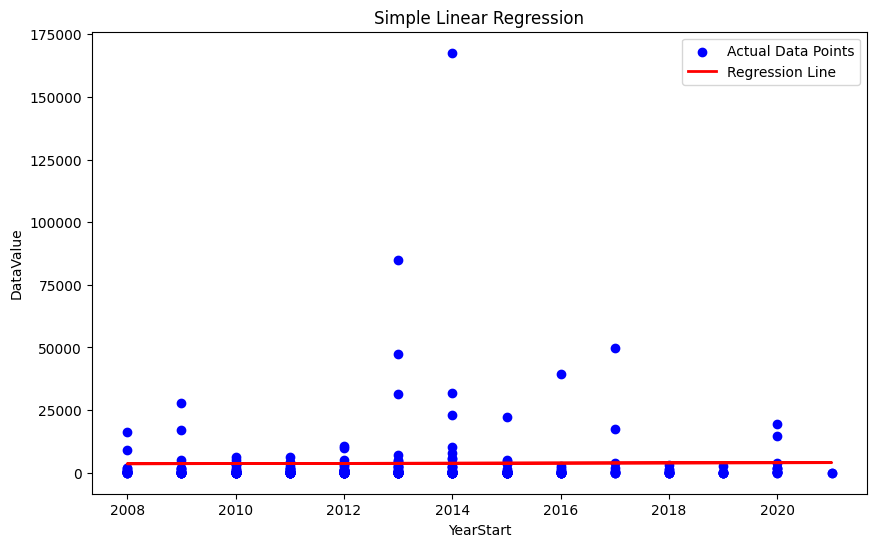

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('YearStart')
plt.ylabel('DataValue')
plt.legend()
plt.show()

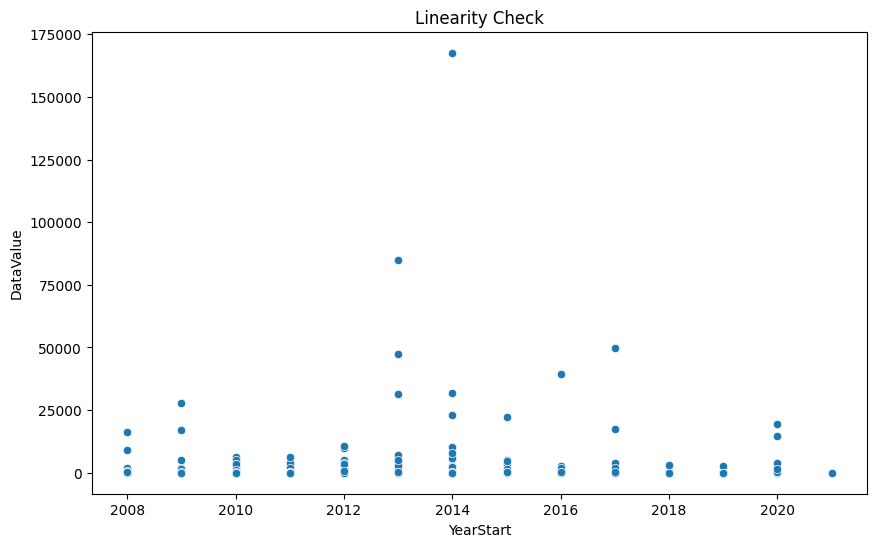

In [26]:
# Check linearity (scatterplot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['YearStart'], y=y_test)
plt.title('Linearity Check')
plt.xlabel('YearStart')
plt.ylabel('DataValue')
plt.show()

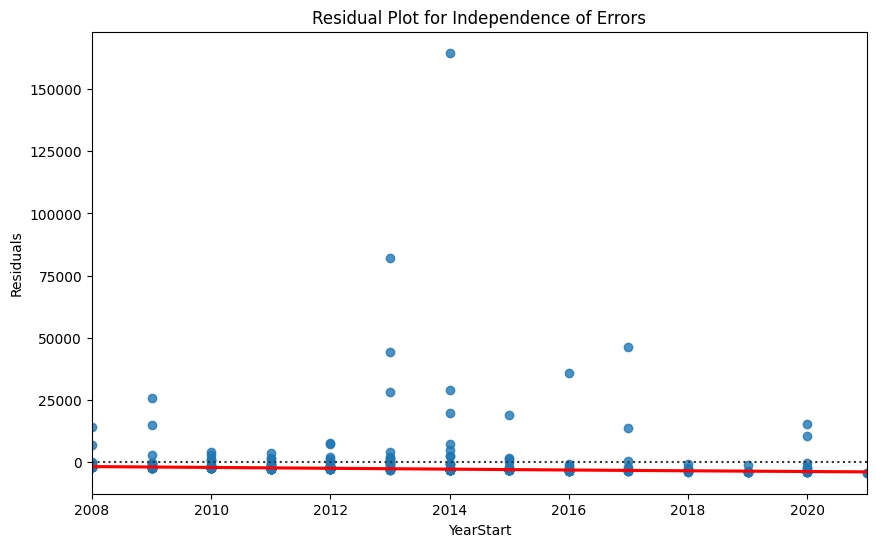

In [30]:
# Check independence of errors (residual plot)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=X_test['YearStart'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot for Independence of Errors')
plt.xlabel('YearStart')
plt.ylabel('Residuals')
plt.show()

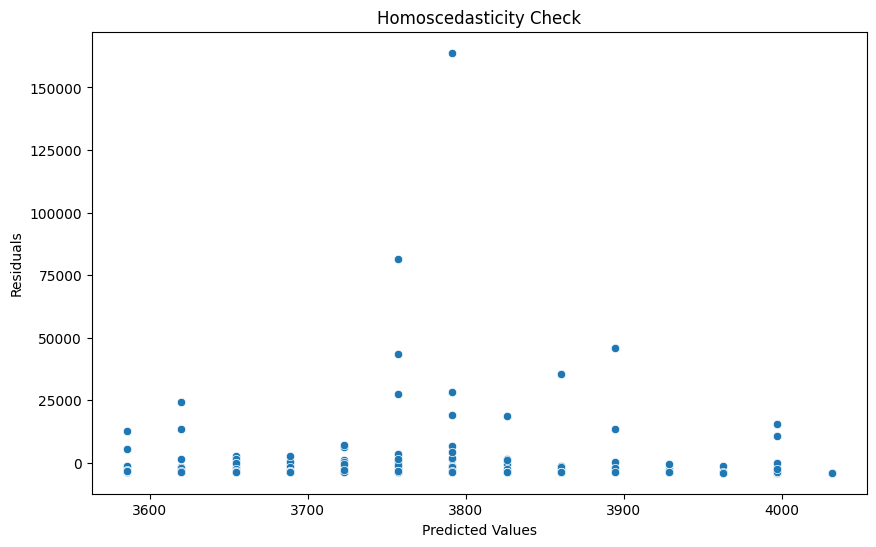

In [28]:
# Check constant variance (homoscedasticity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Homoscedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

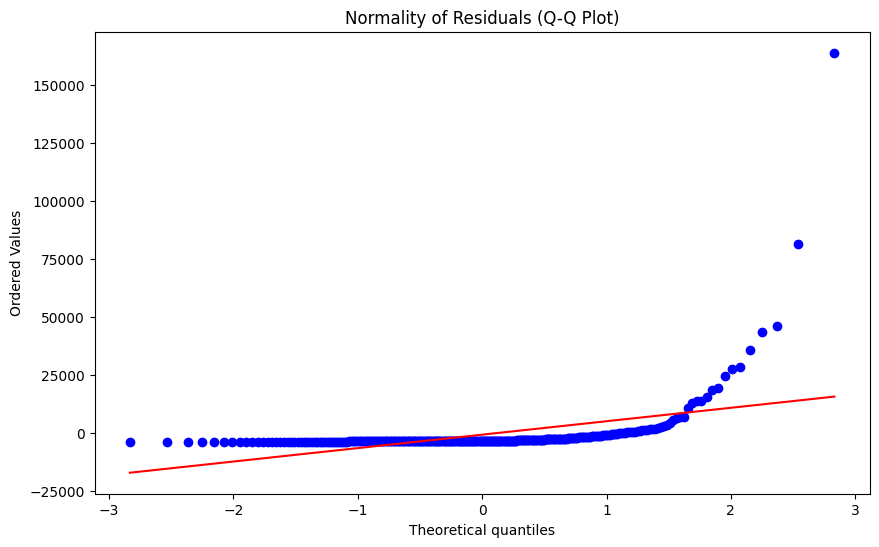

In [29]:
# Check normality of errors (Q-Q plot)
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality of Residuals (Q-Q Plot)')
plt.show()

## Multiple Linear Regression

Why I Chose this Dataset:

## Model Evaluation